In [1]:
import os
import pandas
import matplotlib.pyplot as plt

In [12]:
type = {
        }

In [44]:
nametype = []
imgnum = []
with open('data/txt/totalFileTrain.txt', 'r') as f:
    for line in f :
        print(line.split()[0])
        type[line.split()[0]] = int(line.split()[1])
        nametype.append(line.split()[0])
        imgnum.append(int(line.split()[1])) 

2D-Display-Pad
2D-Display-Phone
2D-Print-Album
2D-Print-Newspaper
2D-Print-Photo
2D-Print-Poster
3D-AdultDoll
3D-GarageKit
3D-Mask
living


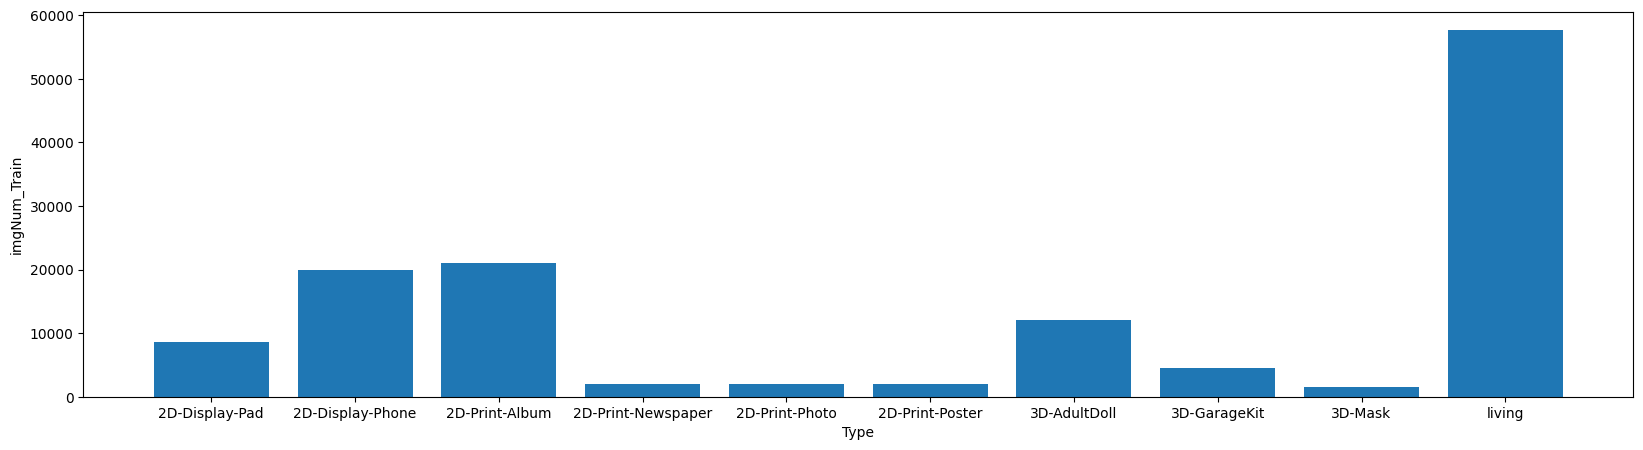

In [54]:
fig = plt.figure(figsize=(20, 5))
plt.bar(nametype,imgnum)
plt.xlabel('Type' )
plt.ylabel('imgNum_Train')
plt.show()

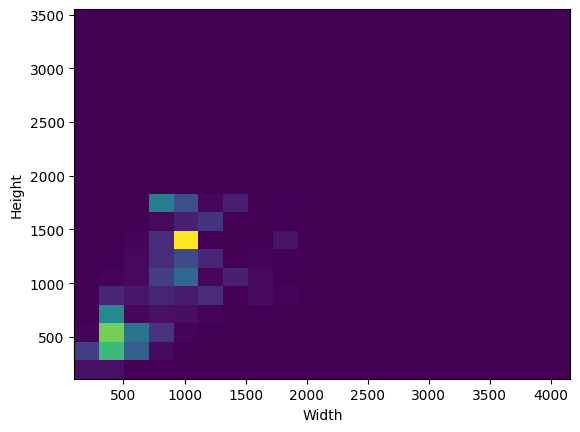

In [2]:
import os
import cv2
import matplotlib.pyplot as plt

# Đường dẫn đến thư mục chứa ảnh
folder_path = 'data/train/0'

# Khởi tạo danh sách để lưu trữ kích thước của các ảnh
sizes = []

# Lặp qua tất cả các tệp trong thư mục
for filename in os.listdir(folder_path):
    # Kiểm tra nếu tệp là một tệp ảnh
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Đọc kích thước ảnh bằng OpenCV
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        height, width, channels = img.shape
        
        # Thêm kích thước của ảnh vào danh sách
        sizes.append((width, height))

# Tách kích thước chiều dài và rộng thành hai danh sách riêng biệt
widths = [size[0] for size in sizes]
heights = [size[1] for size in sizes]

# Vẽ biểu đồ phân bố kích thước ảnh bằng Matplotlib
plt.hist2d(widths, heights, bins=20)
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

In [4]:
print()

TypeError: '>' not supported between instances of 'list' and 'int'